In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#Reading the train dataset
train_df=pd.read_csv("train.csv")
train_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     16644 non-null  object 
 1   date                   16644 non-null  object 
 2   warehouse_ID           16644 non-null  object 
 3   Latitude               16312 non-null  float64
 4   Longitude              16228 non-null  float64
 5   Product_Type           16644 non-null  object 
 6   year                   16644 non-null  int64  
 7   month                  16644 non-null  object 
 8   is_weekend             16145 non-null  object 
 9   is_warehouse_closed    16478 non-null  object 
 10  daily_dispatch_count   16644 non-null  float64
 11  weekly_dispatch_count  2372 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.5+ MB


In [4]:
#Check whether there are missing values in the train data

train_df.isnull().sum()

ID                           0
date                         0
warehouse_ID                 0
Latitude                   332
Longitude                  416
Product_Type                 0
year                         0
month                        0
is_weekend                 499
is_warehouse_closed        166
daily_dispatch_count         0
weekly_dispatch_count    14272
dtype: int64

In [5]:
#We observe that tarin data has empty values in the weekly_dispatch_count
train_df1=train_df[train_df['weekly_dispatch_count'].notnull()]
train_df1.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
14,0x2717,2017-01-08,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,4.5,37.1
15,0x33ed,2017-01-08,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.5,48.3
28,0x271e,2017-01-15,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,4.6,37.5


In [6]:
train_df1.shape

(2372, 12)

In [7]:
#Split the train data to preduct weekly_dispatch_count for the rows missing weekly dispatch counts
test_df1=train_df[train_df['weekly_dispatch_count'].isnull()]

In [8]:
test_df1.shape

(14272, 12)

In [9]:
#Reading the test dataset
test_df=pd.read_csv("test.csv")
test_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed
0,0x31fc,2021-05-01,WH_0x3e9,41.681471,NaN,Type_A,2021,May,NaN,No
1,0x31fd,2021-05-01,WH_0x3e9,41.681471,NaN,Type_B,2021,May,Yes,No
2,0x3ed2,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_A,2021,May,Yes,No
3,0x3ed3,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_B,2021,May,Yes,No
4,0x4a3a,2021-05-01,WH_0x3eb,35.678970,-109.067413,Type_A,2021,May,Yes,Yes


In [10]:
test_df.shape

(4900, 10)

In [11]:
train_df.shape

(16644, 12)

In [12]:
final_df=pd.concat([train_df,test_df],axis=0)

In [13]:
final_df.shape

(21544, 12)

In [14]:
final_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN


In [15]:
pd.to_datetime(final_df['date'])

0      2017-01-01
1      2017-01-01
2      2017-01-02
3      2017-01-02
4      2017-01-03
          ...    
4895   2021-12-31
4896   2021-12-31
4897   2021-12-31
4898   2021-12-31
4899   2021-12-31
Name: date, Length: 21544, dtype: datetime64[ns]

In [16]:
final_df['Product_Type'].unique()

array(['Type_A', 'Type_B'], dtype=object)

In [17]:
#Label encoding on Product Type field
final_df['Product_Type']=final_df['Product_Type'].map({'Type_A':1,'Type_B':2})
final_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,1,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,1,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,1,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,1,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,1,2017,January,No,No,5.8,NaN


In [18]:
final_df['month']=final_df['month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
final_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,1,2017,1,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,1,2017,1,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,1,2017,1,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,1,2017,1,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,1,2017,1,No,No,5.8,NaN


In [19]:
final_df['is_weekend']=final_df['is_weekend'].map({'Yes':1,'No':0})
final_df['is_warehouse_closed']=final_df['is_warehouse_closed'].map({'Yes':1,'No':0})
final_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,1,2017,1,1.0,0.0,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,1,2017,1,1.0,0.0,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,0.0,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,1,2017,1,0.0,0.0,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,0.0,5.8,NaN


In [20]:
train_df1=final_df[final_df['ID'].isin(train_df1['ID'])]
train_df1.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,1,2017,1,1.0,0.0,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,1,2017,1,1.0,0.0,6.1,6.1
14,0x2717,2017-01-08,WH_0x3e9,41.681471,-72.794746,1,2017,1,1.0,0.0,4.5,37.1
15,0x33ed,2017-01-08,WH_0x3ea,38.749077,-105.183060,1,2017,1,1.0,0.0,6.5,48.3
28,0x271e,2017-01-15,WH_0x3e9,41.681471,-72.794746,1,2017,1,1.0,0.0,4.6,37.5


In [21]:
test_df1=final_df[final_df['ID'].isin(test_df1['ID'])]
test_df1.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,0.0,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,1,2017,1,0.0,0.0,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,0.0,5.8,NaN
5,0x33e8,2017-01-03,WH_0x3ea,38.749077,-105.183060,1,2017,1,NaN,0.0,8.1,NaN
6,0x2713,2017-01-04,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,0.0,6.6,NaN


<AxesSubplot:>

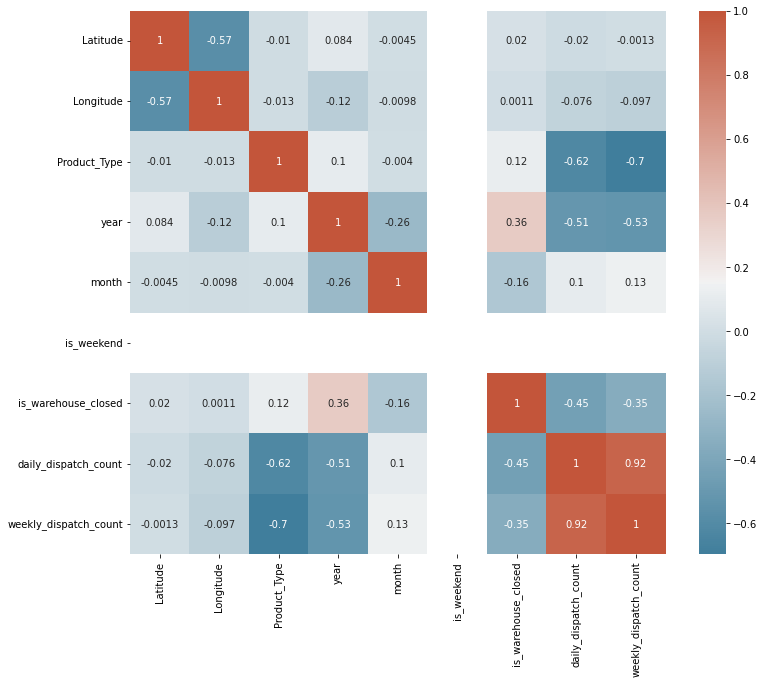

In [22]:
#Plotting a Heatmap to identify the correlation between the independant features and the dependant feature
corr = train_df1.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap=cmap)

In [23]:
#The heatmap shows that is_weekend is completely uncorrelated, hence dropping it
train_df1.drop('is_weekend', inplace=True, axis=1)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
train_df1.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,1,2017,1,0.0,6.1,6.1
14,0x2717,2017-01-08,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,4.5,37.1
15,0x33ed,2017-01-08,WH_0x3ea,38.749077,-105.183060,1,2017,1,0.0,6.5,48.3
28,0x271e,2017-01-15,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,4.6,37.5


In [25]:
train_df1.fillna(0)

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,1,2017,1,0.0,6.1,6.1
14,0x2717,2017-01-08,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,4.5,37.1
15,0x33ed,2017-01-08,WH_0x3ea,38.749077,-105.183060,1,2017,1,0.0,6.5,48.3
28,0x271e,2017-01-15,WH_0x3e9,41.681471,-72.794746,1,2017,1,0.0,4.6,37.5
...,...,...,...,...,...,...,...,...,...,...,...
16539,0x6f49,2021-04-25,WH_0x3f0,37.915825,-89.829262,2,2021,4,0.0,3.8,16.8
16540,0x74be,2021-04-25,WH_0x3f1,48.692551,-116.319862,1,2021,4,0.0,5.6,43.5
16541,0x74bf,2021-04-25,WH_0x3f1,48.692551,-116.319862,2,2021,4,1.0,0.0,12.3
16542,0x7942,2021-04-25,WH_0x3f2,61.600803,-149.125259,1,2021,4,0.0,7.6,55.9


In [26]:
train_df1.isnull().sum()

ID                        0
date                      0
warehouse_ID              0
Latitude                 44
Longitude                68
Product_Type              0
year                      0
month                     0
is_warehouse_closed      19
daily_dispatch_count      0
weekly_dispatch_count     0
dtype: int64

In [27]:
train_df1['Latitude']=train_df1['Latitude'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/3678586999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1['Latitude']=train_df1['Latitude'].fillna(0)


In [28]:
train_df1['Longitude']=train_df1['Longitude'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/543189213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1['Longitude']=train_df1['Longitude'].fillna(0)


In [29]:
train_df1['is_warehouse_closed']=train_df1['is_warehouse_closed'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/4121231987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1['is_warehouse_closed']=train_df1['is_warehouse_closed'].fillna(0)


In [30]:
X = np.asarray(train_df1[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count']])
X[0:5]

array([[ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  5.5000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  6.1000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  4.5000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  6.5000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  4.6000000e+00]])

In [31]:
y = np.asarray(train_df1['weekly_dispatch_count'])
y[0:5]

array([ 5.5,  6.1, 37.1, 48.3, 37.5])

In [32]:
#Cross validation using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1897, 7) (1897,)
Test set: (475, 7) (475,)


In [33]:
from sklearn.tree import DecisionTreeRegressor

DTregressor = DecisionTreeRegressor(random_state=0)
DTregressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [34]:
yhat = DTregressor.predict(X_test)
yhat[0:5]

array([76.4, 17.3, 54.3, 15.8, 11.8])

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, yhat))
print(r2_score(y_test, yhat))


4.344561403508773
0.9125493234291027


In [36]:
from sklearn.ensemble import RandomForestRegressor

RFregr = RandomForestRegressor(max_depth=15, random_state=0)
RFregr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=0)

In [37]:
yhat = RFregr.predict(X_test)
yhat[0:5]

array([71.56933333, 20.24180833, 58.0818    , 12.80925   , 13.3999    ])

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, yhat))
print(r2_score(y_test, yhat))

3.6506115091201687
0.936140866746838


We observer that Random forest regressor with N_estimator=15 is giving the best R2 score and least MAE.

In [43]:
test_df1.isnull().sum()

ID                           0
date                         0
warehouse_ID                 0
Latitude                     0
Longitude                    0
Product_Type                 0
year                         0
month                        0
is_weekend                 429
is_warehouse_closed          0
daily_dispatch_count         0
weekly_dispatch_count    14272
dtype: int64

In [50]:
test_df1['ID'].isnull().values.any()

False

In [40]:
test_df1['Longitude']=test_df1['Longitude'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/343426492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1['Longitude']=test_df1['Longitude'].fillna(0)


In [41]:
test_df1['Latitude']=test_df1['Latitude'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/2941693710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1['Latitude']=test_df1['Latitude'].fillna(0)


In [42]:
test_df1['is_warehouse_closed']=test_df1['is_warehouse_closed'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/4176240824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1['is_warehouse_closed']=test_df1['is_warehouse_closed'].fillna(0)


In [44]:
df = np.asarray(test_df1[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count']])

In [45]:
df [0:5]

array([[ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  4.8000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  6.7000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  5.8000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  8.1000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  6.6000000e+00]])

In [46]:
#Making the predictions using Random Forest Regression model
yhat = RFregr.predict(df)

In [54]:
#Getting the weekly_dispatch_count of the rows missing the values in the train data
new_df = pd.DataFrame(yhat,columns = ['weekly_dispatch_count'])

In [63]:
test_df1.index = np.arange(0, len(test_df1))

In [66]:
new_df['ID']=test_df1['ID']

In [67]:
new_df=new_df.reindex(columns=['ID','weekly_dispatch_count'])

new_df.head(30)

,ID,weekly_dispatch_count
0,0x2711,35.392036
1,0x33e7,50.955900
2,0x2712,31.954667
3,0x33e8,58.780000
4,0x2713,43.046000
5,0x33e9,54.121333
6,0x2714,35.320750
7,0x33ea,54.940833
8,0x2715,33.261583
9,0x33eb,55.270833


In [68]:
#Writing the output to a .csv file
new_df.to_csv('sample_output.csv',index=False)

In [70]:
new_df[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count']]=test_df1[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count']]

In [73]:
new_df.head()

,ID,Latitude,Longitude,Product_Type,year,month,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2711,41.681471,-72.794746,1,2017,1,0.0,4.8,35.392036
1,0x33e7,38.749077,-105.183060,1,2017,1,0.0,6.7,50.955900
2,0x2712,41.681471,-72.794746,1,2017,1,0.0,5.8,31.954667
3,0x33e8,38.749077,-105.183060,1,2017,1,0.0,8.1,58.780000
4,0x2713,41.681471,-72.794746,1,2017,1,0.0,6.6,43.046000


In [72]:
new_df=new_df.reindex(columns=['ID','Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count','weekly_dispatch_count'])

In [82]:
train_df1.index = np.arange(0, len(train_df1))

In [83]:
#Getting the new train data
train_df2=pd.concat([train_df1,new_df],axis=0)

In [89]:
train_df2.tail()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
14267,0x6f53,NaN,NaN,37.915825,-89.829262,2,2021,4,0.0,0.2,7.855
14268,0x74c8,NaN,NaN,48.692551,-116.319862,1,2021,4,0.0,12.3,67.975
14269,0x74c9,NaN,NaN,48.692551,-116.319862,2,2021,4,0.0,3.3,11.108
14270,0x794c,NaN,NaN,61.600803,-149.125259,1,2021,4,0.0,7.1,47.272
14271,0x794d,NaN,NaN,61.600803,-149.125259,2,2021,4,0.0,3.4,11.721


In [85]:
train_df2.shape

(16644, 11)

In [90]:
test_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed
0,0x31fc,2021-05-01,WH_0x3e9,41.681471,NaN,Type_A,2021,May,NaN,No
1,0x31fd,2021-05-01,WH_0x3e9,41.681471,NaN,Type_B,2021,May,Yes,No
2,0x3ed2,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_A,2021,May,Yes,No
3,0x3ed3,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_B,2021,May,Yes,No
4,0x4a3a,2021-05-01,WH_0x3eb,35.678970,-109.067413,Type_A,2021,May,Yes,Yes


In [114]:
X = np.asarray(train_df2[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed']])
X[0:5]

array([[ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00]])

In [115]:
y = np.asarray(train_df2['daily_dispatch_count'])
y[0:5]

array([5.5, 6.1, 4.5, 6.5, 4.6])

In [124]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 4899
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4900 non-null   object 
 1   date                   4900 non-null   object 
 2   warehouse_ID           4900 non-null   object 
 3   Latitude               4900 non-null   float64
 4   Longitude              4900 non-null   float64
 5   Product_Type           4900 non-null   int64  
 6   year                   4900 non-null   int64  
 7   month                  4900 non-null   int64  
 8   is_warehouse_closed    4900 non-null   float64
 9   daily_dispatch_count   0 non-null      float64
 10  weekly_dispatch_count  0 non-null      float64
dtypes: float64(5), int64(3), object(3)
memory usage: 459.4+ KB


In [117]:
test_df=final_df[final_df['ID'].isin(test_df['ID'])]
test_df.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x31fc,2021-05-01,WH_0x3e9,41.681471,NaN,1,2021,5,NaN,0.0,NaN,NaN
1,0x31fd,2021-05-01,WH_0x3e9,41.681471,NaN,2,2021,5,1.0,0.0,NaN,NaN
2,0x3ed2,2021-05-01,WH_0x3ea,38.749077,-105.183060,1,2021,5,1.0,0.0,NaN,NaN
3,0x3ed3,2021-05-01,WH_0x3ea,38.749077,-105.183060,2,2021,5,1.0,0.0,NaN,NaN
4,0x4a3a,2021-05-01,WH_0x3eb,35.678970,-109.067413,1,2021,5,1.0,1.0,NaN,NaN


In [123]:
test_df.isnull().sum()

ID                          0
date                        0
warehouse_ID                0
Latitude                    0
Longitude                   0
Product_Type                0
year                        0
month                       0
is_warehouse_closed         0
daily_dispatch_count     4900
weekly_dispatch_count    4900
dtype: int64

In [119]:
test_df.drop('is_weekend', inplace=True, axis=1)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [120]:
test_df['Latitude']=test_df['Latitude'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/1074334015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Latitude']=test_df['Latitude'].fillna(0)


In [121]:
test_df['Longitude']=test_df['Longitude'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/462835554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Longitude']=test_df['Longitude'].fillna(0)


In [122]:
test_df['is_warehouse_closed']=test_df['is_warehouse_closed'].fillna(0)

C:\Users\dell\AppData\Local\Temp/ipykernel_24456/3888483556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['is_warehouse_closed']=test_df['is_warehouse_closed'].fillna(0)


In [112]:
#Making the predictions using Random Forest Regression model
RFregr.fit(X, y)

RandomForestRegressor(max_depth=15, random_state=0)

In [125]:
df = np.asarray(test_df[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed']])

In [126]:
#Predicting the daily_dispatch_count in test data using RF regressor built
yhat = RFregr.predict(df)
yhat[0:5]

array([5.23819669, 1.55776149, 6.41894079, 2.21940704, 0.        ])

In [127]:
new_df = pd.DataFrame(yhat,columns = ['daily_dispatch_count'])

In [130]:
new_df[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed']]=test_df[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed']]

In [135]:
new_df.head()

,ID,Latitude,Longitude,Product_Type,year,month,is_warehouse_closed,daily_dispatch_count
0,0x31fc,41.681471,0.000000,1,2021,5,0.0,5.238197
1,0x31fd,41.681471,0.000000,2,2021,5,0.0,1.557761
2,0x3ed2,38.749077,-105.183060,1,2021,5,0.0,6.418941
3,0x3ed3,38.749077,-105.183060,2,2021,5,0.0,2.219407
4,0x4a3a,35.678970,-109.067413,1,2021,5,1.0,0.000000


In [134]:
new_df=new_df.reindex(columns=['ID','Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count'])

In [137]:
X = np.asarray(train_df2[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count']])
X[0:5]

array([[ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  5.5000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  6.1000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  4.5000000e+00],
       [ 3.8749077e+01, -1.0518306e+02,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  6.5000000e+00],
       [ 4.1681471e+01, -7.2794746e+01,  1.0000000e+00,  2.0170000e+03,
         1.0000000e+00,  0.0000000e+00,  4.6000000e+00]])

In [138]:
y = np.asarray(train_df2['weekly_dispatch_count'])
y[0:5]

array([ 5.5,  6.1, 37.1, 48.3, 37.5])

In [139]:
#Making the predictions using Random Forest Regression model
RFregr.fit(X, y)

RandomForestRegressor(max_depth=15, random_state=0)

In [140]:
df = np.asarray(new_df[['Latitude','Longitude','Product_Type','year','month','is_warehouse_closed','daily_dispatch_count']])

In [141]:
#Predicting the weekly_dispatch_count in test data using RF regressor built
yhat = RFregr.predict(df)
yhat[0:5]

array([25.3954295 , 10.99488917, 41.27021   , 10.26568285, 28.26557517])

In [142]:
new_df = pd.DataFrame(yhat,columns = ['weekly_dispatch_count'])

In [152]:
new_df.shape

(700, 2)

In [144]:
new_df['ID']=test_df['ID']

In [150]:
new_df=new_df.reindex(columns=['ID','weekly_dispatch_count'])

new_df.head()

,ID,weekly_dispatch_count
0,0x31fc,25.395429
1,0x31fd,10.994889
2,0x3ed2,41.270210
3,0x3ed3,10.265683
4,0x4a3a,28.265575


In [151]:
new_df=new_df[:700]

In [153]:
#Writing the output to a .csv file
new_df.to_csv('submission_weekly.csv',index=False)